- Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 

- Read that data into Python and call the dataframe churnData.

In [2]:
def load_data():
    churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")
    return churnData
churnData = load_data()

In [3]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [4]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
def convert_to_numeric(churnData):
    churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
    return churnData
churnData = convert_to_numeric(churnData)

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

- Check for null values in the dataframe. Replace the null values.

In [7]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [8]:
def replace_null_values(churnData):
    mean_TotalCharges = np.mean(churnData['TotalCharges'])
    churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_TotalCharges)
    return churnData
churnData = replace_null_values(churnData)

In [9]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [10]:
def drop_columns(churnData):
    churnData.drop(columns=['gender','Partner','Dependents','PhoneService',
                            'OnlineSecurity','OnlineBackup','DeviceProtection',
                            'TechSupport','StreamingTV','StreamingMovies',
                            'Contract'],inplace=True)
    return churnData
churnData = drop_columns(churnData)

In [11]:
churnData

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.50,No
7039,0,72,103.20,7362.90,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.60,Yes


In [12]:
def hot_coding_categorical_variables(churnData):
    categoricals_features= churnData.select_dtypes("object")
    print(categoricals_features)
    
    categoricals_features=pd.get_dummies(categoricals_features[['Churn']], drop_first=True)
    print(categoricals_features)
    
    #adding categorical features
    churnData = pd.concat([churnData,categoricals_features],axis=1)
    return churnData
churnData = hot_coding_categorical_variables(churnData)

     Churn
0       No
1       No
2      Yes
3       No
4      Yes
...    ...
7038    No
7039    No
7040    No
7041   Yes
7042    No

[7043 rows x 1 columns]
      Churn_Yes
0             0
1             0
2             1
3             0
4             1
...         ...
7038          0
7039          0
7040          0
7041          1
7042          0

[7043 rows x 1 columns]


In [13]:
churnData

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Churn_Yes
0,0,1,29.85,29.85,No,0
1,0,34,56.95,1889.50,No,0
2,0,2,53.85,108.15,Yes,1
3,0,45,42.30,1840.75,No,0
4,0,2,70.70,151.65,Yes,1
...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,No,0
7039,0,72,103.20,7362.90,No,0
7040,0,11,29.60,346.45,No,0
7041,1,4,74.40,306.60,Yes,1


In [14]:
# define X,y
X = churnData.drop(columns=['Churn','Churn_Yes'], axis = 1)
y = churnData['Churn_Yes']

- Split the data into a training set and a test set.

In [19]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

- Scale the features either by using normalizer or a standard scaler.

In [20]:
def standardize(churnData):
    std_scaler=StandardScaler().fit(X_train) 
    # finding the parameters (mean, variance from the training set)

    X_train_scaled=std_scaler.transform(X_train)
    print(X_train_scaled)

    X_test_scaled=std_scaler.transform(X_test)
    print(X_test_scaled)
    
churnData = standardize(churnData)

[[-0.43584282 -0.95520209  0.2679385  -0.72323288]
 [-0.43584282 -0.75110969  0.59379741 -0.48657117]
 [-0.43584282  1.28981426 -0.56926825  0.38383476]
 ...
 [-0.43584282  1.04490339 -1.47498893 -0.48614983]
 [ 2.29440511 -1.28174992  0.162661   -0.98120567]
 [-0.43584282 -1.15929448 -1.48668643 -0.97022858]]
[[-0.43584282 -0.5470173  -0.22335648 -0.54855294]
 [-0.43584282  1.12654035  1.72845486  2.11444567]
 [-0.43584282 -0.79192817  0.23618814 -0.60239614]
 ...
 [ 2.29440511  1.49390666  1.50620237  2.37379337]
 [-0.43584282  0.79999251 -1.3479875  -0.42179523]
 [ 2.29440511  0.10607837  0.55870491  0.23647559]]


- Fit a logistic Regression model on the training data.

,Error_metric,Train,Test
0,Accuracy,0.794320,0.786086
1,Precision,0.669283,0.629820
2,Recall,0.453647,0.443038



Confusion matrix for the train set
[[3319  295]
 [ 719  597]]


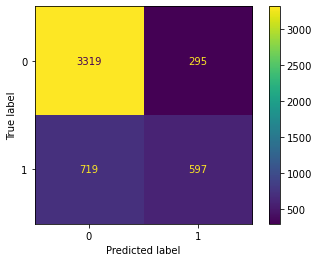


Confusion matrix for the test set
[[1416  144]
 [ 308  245]]


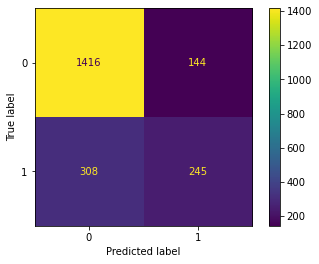

In [22]:
def logistic_regression_model(churnData):

    trans = PowerTransformer()

    trans.fit(X_train)

    X_train_mod = trans.transform(X_train)
    X_test_mod  = trans.transform(X_test)

    log_model = LogisticRegression() 
    
    log_model.fit(X_train_mod, y_train)

    y_pred_train_log = log_model.predict(X_train_mod)
    y_pred_test_log = log_model.predict(X_test_mod)

    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

    display(performance_log)

    print()

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_pred_train_log))
    plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test_log))
    plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
    plt.show()
    
churnData = logistic_regression_model(churnData)

- Fit a Knn Classifier model on the training data

,Error_metric,Train,Test
0,Accuracy,0.835903,0.774728
1,Precision,0.734940,0.584615
2,Recall,0.602584,0.481013



Confusion matrix for the train set
[[3328  286]
 [ 523  793]]


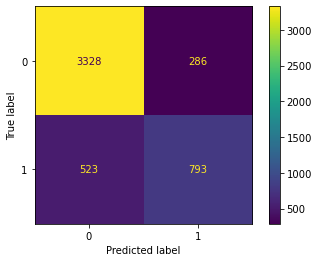


Confusion matrix for the test set
[[1371  189]
 [ 287  266]]


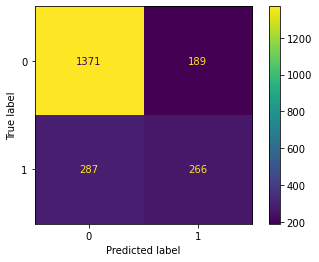

In [23]:
def Knn_Classifier_model (churnData):

    trans = PowerTransformer()

    trans.fit(X_train)

    X_train_mod = trans.transform(X_train)
    X_test_mod  = trans.transform(X_test)

    log_model = KNeighborsClassifier() 
    
    log_model.fit(X_train_mod, y_train)

    y_pred_train_log = log_model.predict(X_train_mod)
    y_pred_test_log = log_model.predict(X_test_mod)

    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

    display(performance_log)

    print()

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_pred_train_log))
    plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test_log))
    plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
    plt.show()
    
churnData = Knn_Classifier_model (churnData)